# Importing Necessary libraries

In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Importing Dataset

In [277]:
train_data = pd.read_csv(r"C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\Intermediate assesment\train_set.csv")
test_data = pd.read_csv(r"C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\Intermediate assesment\test_set.csv")

In [278]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [279]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


So test data has no target columns

In [280]:
# saving the test set id column as s separate dataframe for future sample submission

id = test_data[['employee_id']]

# EDA

In [281]:
train_data.shape

(54808, 14)

In [282]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


there are 5 cols which are not numerical

Cols education and previous year rating have null values

In [283]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


<Axes: >

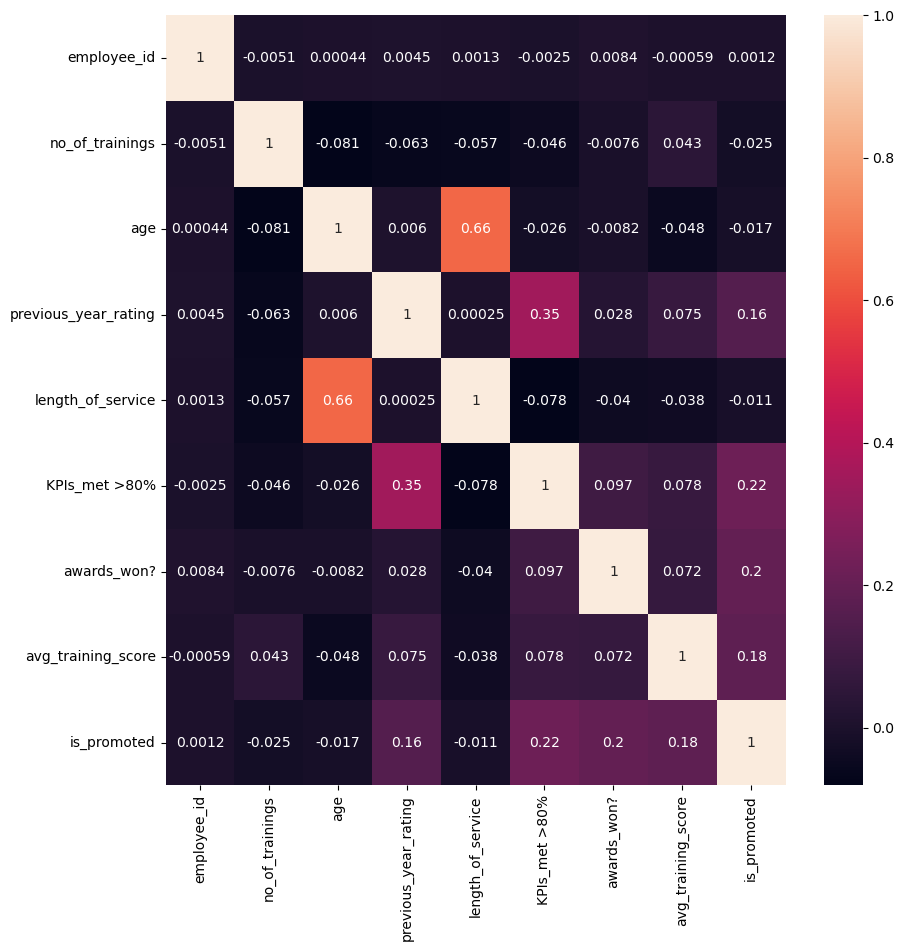

In [284]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.select_dtypes('number').corr(), annot=True)

only age and length of service have a corr higher than 0.5

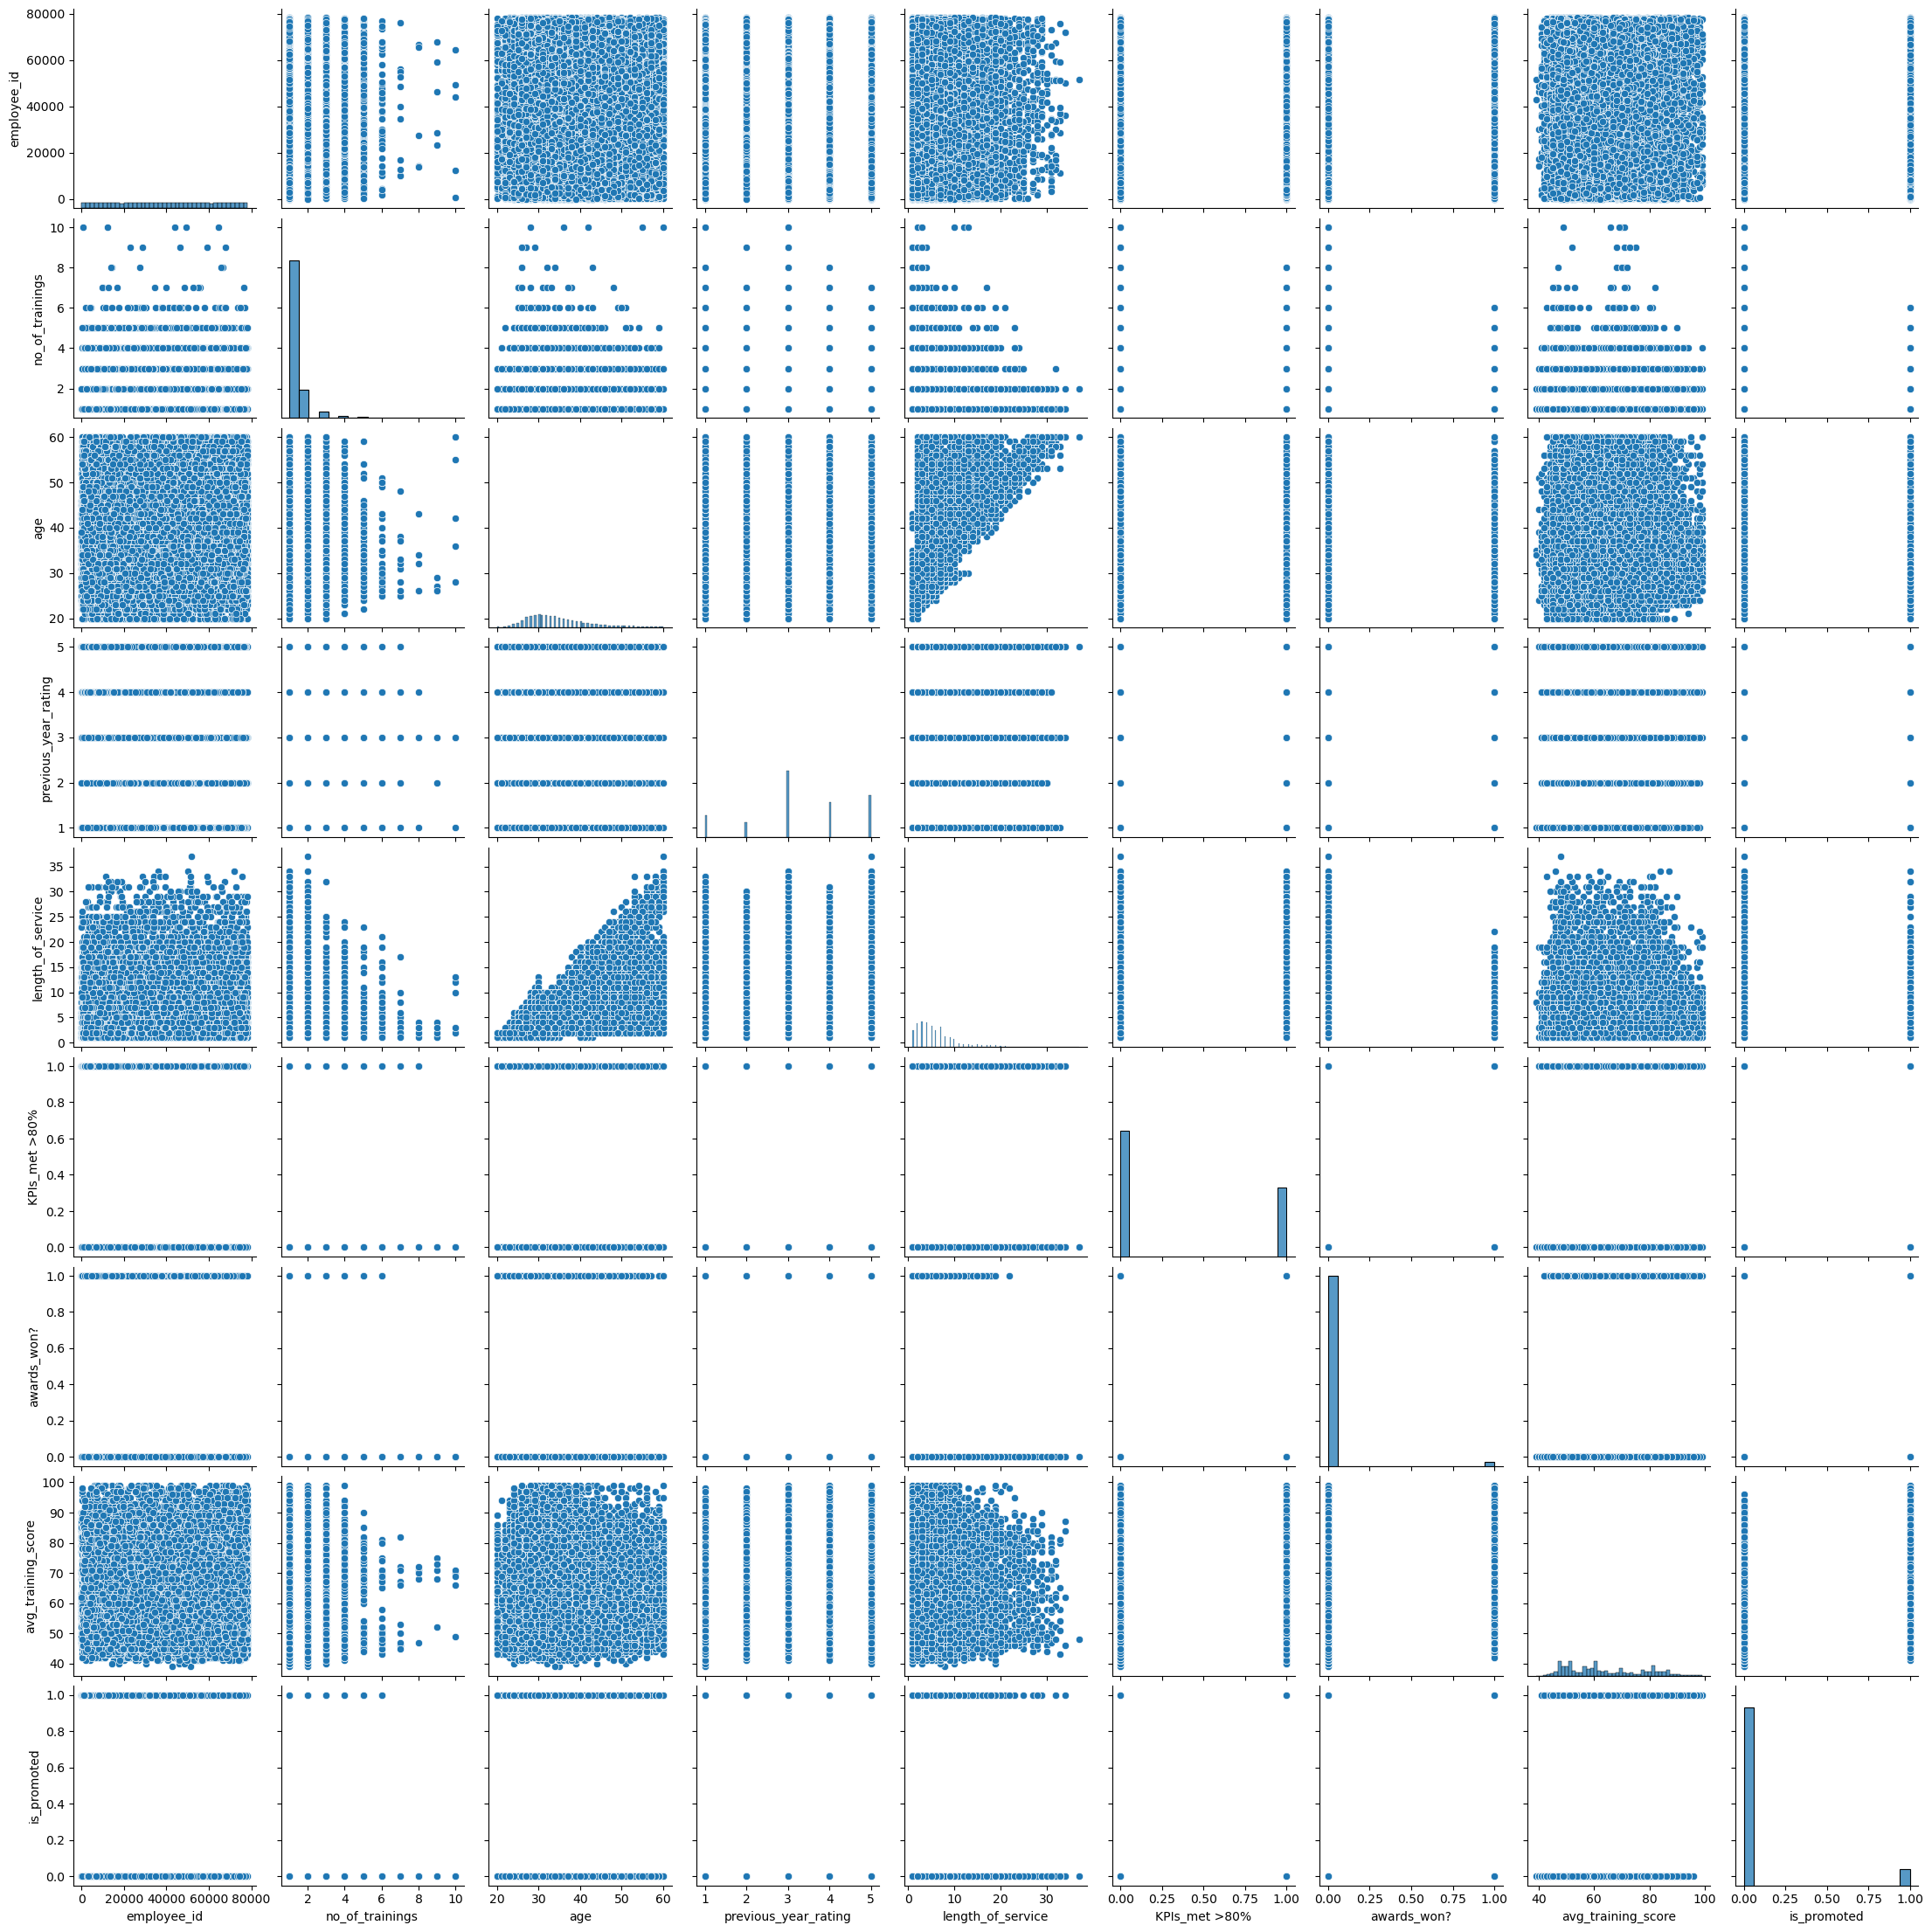

In [285]:
sns.pairplot(train_data)

# Data Preprocessing

## Outlier Detection

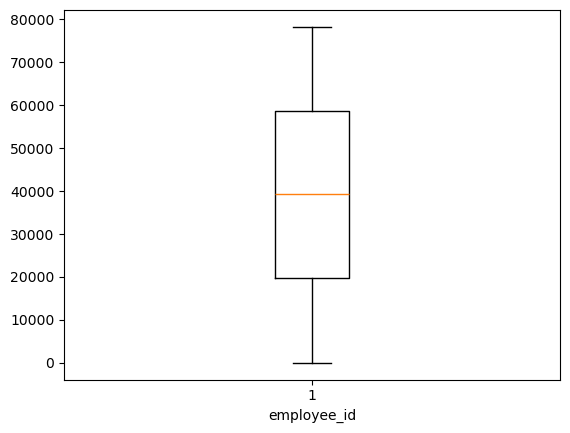

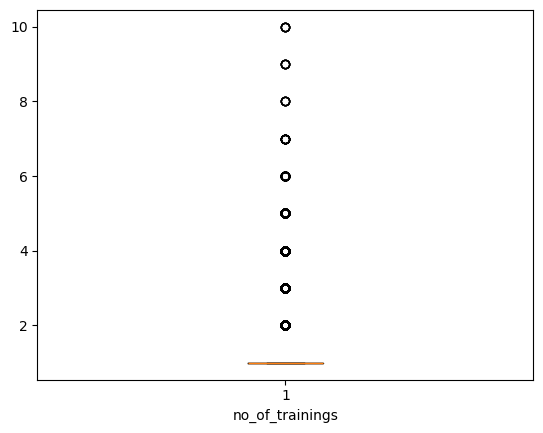

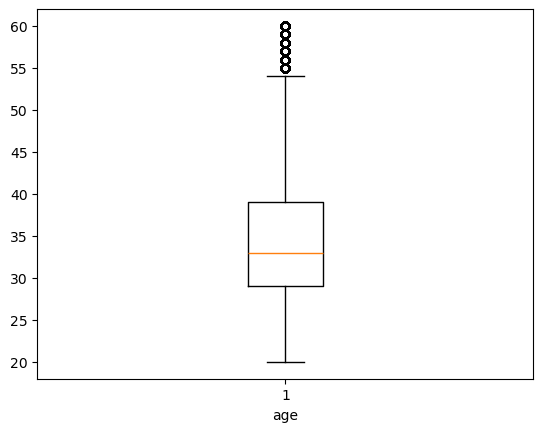

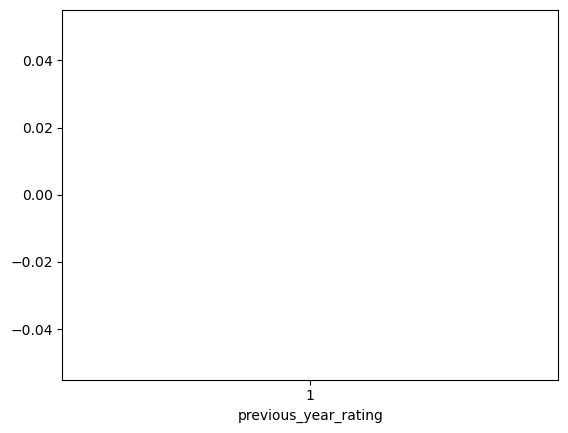

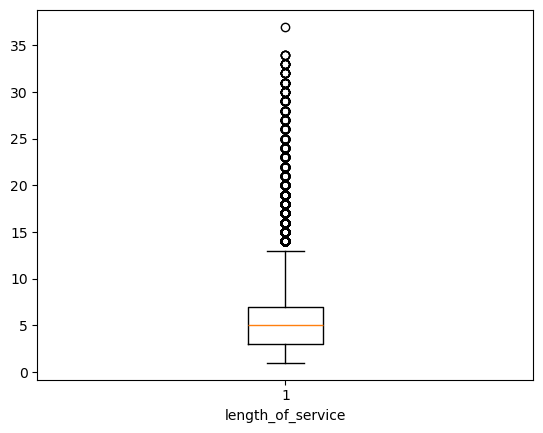

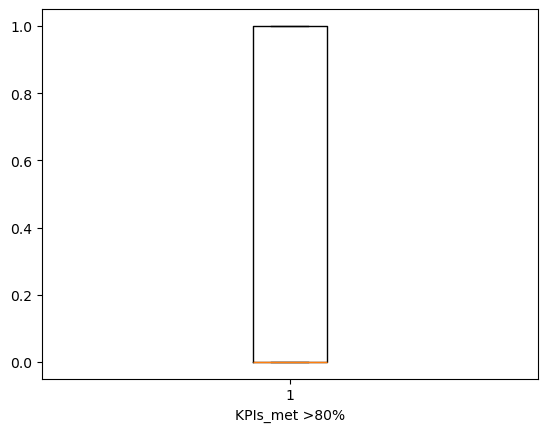

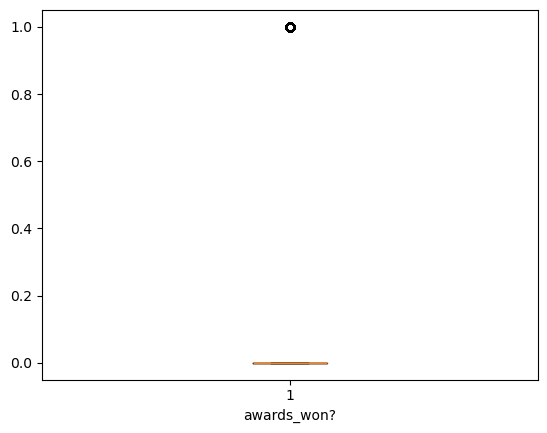

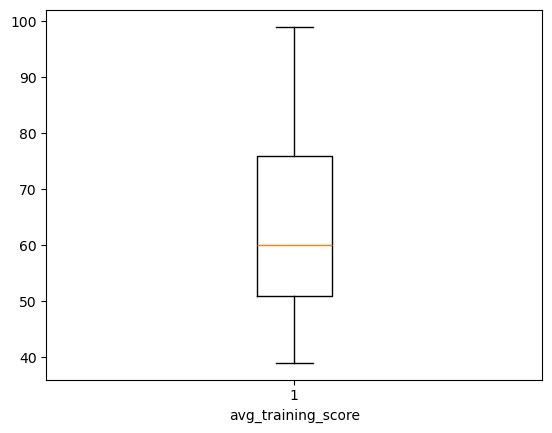

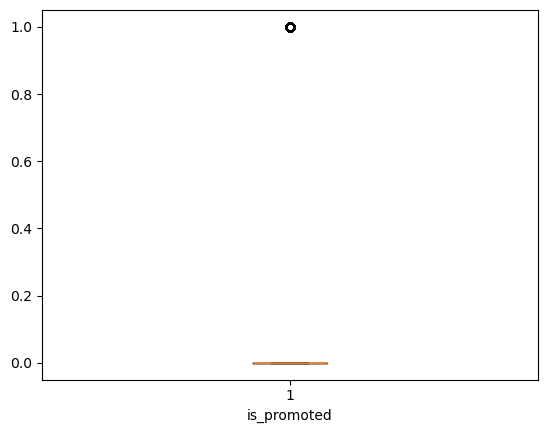

In [286]:
for col in train_data.select_dtypes('number'):
    plt.boxplot(train_data[col])
    plt.xlabel(col)
    plt.show()

 There are no significant outliers in the data - from boxplot and pairplot

In [287]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [288]:
#so just chceking the age data = 20 rows.
train_data[train_data['age'] == 20]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
50,24104,Finance,region_2,Bachelor's,m,sourcing,1,20,4.0,2,1,0,60,0
90,62658,Sales & Marketing,region_2,NaN,f,sourcing,1,20,NaN,1,0,0,55,0
950,73959,HR,region_2,Below Secondary,f,sourcing,1,20,NaN,1,0,0,47,0
1045,58569,Procurement,region_2,Below Secondary,m,sourcing,2,20,3.0,2,0,0,74,0
1202,19919,Analytics,region_22,Bachelor's,m,other,1,20,NaN,1,1,0,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53161,47947,Sales & Marketing,region_2,Master's & above,m,other,1,20,4.0,2,0,0,54,0
53379,29392,Sales & Marketing,region_22,NaN,m,sourcing,1,20,NaN,1,0,0,52,0
53805,72627,Sales & Marketing,region_2,Bachelor's,m,sourcing,2,20,4.0,2,1,0,50,0
54491,67491,Sales & Marketing,region_15,Bachelor's,m,sourcing,1,20,NaN,1,0,0,43,0


## Missing Value Handling

In [289]:
train_data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [290]:
test_data.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

### Col prev_year_rating

In [291]:
train_data['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

from the boxplot, the prev year rating have the best correlation witch the KPI>80 col. SO we are filling the nan values with respect to KPI col so that a better filling of the values can happen.

In [292]:
train_data['previous_year_rating'].median()

3.0

In [293]:
train_data.groupby('KPIs_met >80%')['previous_year_rating'].median()

KPIs_met >80%
0    3.0
1    4.0
Name: previous_year_rating, dtype: float64

In [294]:
train_data['previous_year_rating'] = train_data.groupby('KPIs_met >80%')['previous_year_rating'].transform(lambda x : x.fillna(x.median()))

In [295]:
train_data['previous_year_rating'].isna().sum()

0

In [296]:
# with test data

test_data['previous_year_rating'] = test_data.groupby('KPIs_met >80%')['previous_year_rating'].transform(lambda x : x.fillna(x.median()))
test_data['previous_year_rating'].isna().sum()


0

### Col Education

In [297]:
train_data['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [298]:
train_data['education'] = train_data['education'].fillna(train_data['education'].mode()[0])

In [299]:
train_data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

try another method of filling for education column

In [300]:
# For test data

test_data['education'] = test_data['education'].fillna(test_data['education'].mode()[0])
test_data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

## Encoding

In [301]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [302]:
for col in train_data.select_dtypes('object'):
    print(col)
    print(train_data[col].unique())
    print()

department
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']

region
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']

education
["Master's & above" "Bachelor's" 'Below Secondary']

gender
['f' 'm']

recruitment_channel
['sourcing' 'other' 'referred']



In [303]:
# For test data
for col in test_data.select_dtypes('object'):
    print(col)
    print(test_data[col].unique())
    print()

department
['Technology' 'HR' 'Sales & Marketing' 'Procurement' 'Finance' 'Analytics'
 'Operations' 'Legal' 'R&D']

region
['region_26' 'region_4' 'region_13' 'region_2' 'region_29' 'region_7'
 'region_22' 'region_16' 'region_17' 'region_24' 'region_11' 'region_27'
 'region_9' 'region_20' 'region_34' 'region_23' 'region_8' 'region_14'
 'region_31' 'region_19' 'region_5' 'region_28' 'region_15' 'region_3'
 'region_25' 'region_12' 'region_21' 'region_30' 'region_10' 'region_33'
 'region_32' 'region_6' 'region_1' 'region_18']

education
["Bachelor's" "Master's & above" 'Below Secondary']

gender
['m' 'f']

recruitment_channel
['sourcing' 'other' 'referred']



In [304]:
#Column region -- train data

encoder = OrdinalEncoder(dtype= np.int64)

train_data['region'] = encoder.fit_transform(train_data[['region']])

In [305]:
#Column region -- test data

test_data['region'] = encoder.transform(test_data[['region']])

In [306]:
# Department col -- train data
train_data['department'] = encoder.fit_transform(train_data[['department']])

In [307]:
# Department col -- test data
test_data['department'] = encoder.transform(test_data[['department']])

In [308]:
#Enoding the other cols using One hot -- train data
encoder = OneHotEncoder(sparse_output=False)
for col in ['education', 'gender','recruitment_channel']:
    sample = encoder.fit_transform(train_data[[col]])
    df = pd.DataFrame(sample, columns= encoder.get_feature_names_out())
    train_data = pd.concat([train_data, df], axis=1)



In [309]:
train_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,avg_training_score,is_promoted,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,7,31,Master's & above,f,sourcing,1,35,5.0,8,...,49,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,65141,4,14,Bachelor's,m,other,1,30,5.0,4,...,60,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,7513,7,10,Bachelor's,m,sourcing,1,34,3.0,7,...,50,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2542,7,15,Bachelor's,m,other,2,39,1.0,10,...,50,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,48945,8,18,Bachelor's,m,other,1,45,3.0,2,...,73,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,Bachelor's,m,sourcing,1,48,3.0,17,...,78,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
54804,74592,4,19,Master's & above,f,other,1,37,2.0,6,...,56,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
54805,13918,0,0,Bachelor's,m,other,1,27,5.0,3,...,79,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
54806,13614,7,33,Bachelor's,m,sourcing,1,29,1.0,2,...,45,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [310]:
#Enoding the other cols using One hot -- test data
for col in ['education', 'gender','recruitment_channel']:
    sample = encoder.fit_transform(test_data[[col]])
    df = pd.DataFrame(sample, columns= encoder.get_feature_names_out())
    test_data = pd.concat([test_data, df], axis=1)

In [311]:
#dropping unneccary cols in the data
train_data = train_data.drop(['employee_id','gender', 'recruitment_channel', 'education'], axis=1)
test_data = test_data.drop(['employee_id','gender', 'recruitment_channel', 'education'], axis=1)

In [312]:
train_data

,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,7,31,1,35,5.0,8,1,0,49,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,4,14,1,30,5.0,4,0,0,60,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,7,10,1,34,3.0,7,0,0,50,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,7,15,2,39,1.0,10,0,0,50,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,8,18,1,45,3.0,2,0,0,73,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,1,48,3.0,17,0,0,78,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
54804,4,19,1,37,2.0,6,0,0,56,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
54805,0,0,1,27,5.0,3,1,0,79,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
54806,7,33,1,29,1.0,2,0,0,45,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [313]:
test_data

,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,8,18,1,24,4.0,1,1,0,77,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,28,1,31,3.0,5,0,0,51,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,7,4,1,31,1.0,4,0,0,47,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,5,11,3,31,2.0,9,0,0,65,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1,21,1,30,4.0,7,0,0,61,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,3,11,1,24,3.0,1,0,0,61,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
23486,8,17,1,31,3.0,7,0,0,74,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
23487,2,7,1,26,4.0,4,0,0,50,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
23488,5,24,3,27,3.0,1,0,0,70,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Feature Target Split

In [314]:
x_train = train_data.drop('is_promoted', axis = 1)
y_train = train_data['is_promoted']

In [324]:
x_test = test_data.values

In [322]:
y_train.value_counts()  # Imbalanced class


is_promoted
0    50140
1     4668
Name: count, dtype: int64

## Scaling

In [319]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

# Modelling

## Logistic Regression

In [337]:
log = LogisticRegression()
log.fit(x_train_scaled, y_train)

y_pred_log = log.predict(x_test_scaled)

y_pred_log

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [344]:
sample_sub = np.concatenate([id, y_pred_log.reshape(-1,1)], axis=1)
sample_sub = pd.DataFrame(sample_sub, columns= ['employee_id','is_promoted'])

In [345]:
sample_sub

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [346]:
sample_sub.to_csv(r'C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\Intermediate assesment\Results\Logistic_Regression.csv', index=False)

## SVM


In [347]:
svc = SVC()
svc.fit(x_train_scaled, y_train)

y_pred_svc = svc.predict(x_test_scaled)
y_pred_svc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [348]:
sample_sub = np.concatenate([id, y_pred_svc.reshape(-1,1)], axis=1)
sample_sub = pd.DataFrame(sample_sub, columns= ['employee_id','is_promoted'])

sample_sub.to_csv(r'C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\Intermediate assesment\Results\SVC.csv', index=False)

## Naive Bayes

In [349]:
nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred_nb = nb.predict(x_test)
y_pred_nb

d:\Code\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [350]:
sample_sub = np.concatenate([id, y_pred_nb.reshape(-1,1)], axis=1)
sample_sub = pd.DataFrame(sample_sub, columns= ['employee_id','is_promoted'])

sample_sub.to_csv(r'C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\Intermediate assesment\Results\Naive_Bayes.csv', index=False)

## Decision Tree

In [400]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

y_pred_tree = tree.predict(x_test)
y_pred_tree

d:\Code\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
#Checking the f1 score of training data
cross_val_score(tree, X= x_train, y= y_train, cv=5, scoring='f1')

array([0.43867684, 0.41051567, 0.41416626, 0.44289277, 0.41386139])

In [352]:
sample_sub = np.concatenate([id, y_pred_tree.reshape(-1,1)], axis=1)
sample_sub = pd.DataFrame(sample_sub, columns= ['employee_id','is_promoted'])

sample_sub.to_csv(r'C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\Intermediate assesment\Results\Decision_Tree.csv', index=False)

## Random Forest

In [355]:
forest = RandomForestClassifier(n_estimators= 50)
forest.fit(x_train, y_train)

y_pred_forest = forest.predict(x_test)
y_pred_forest

d:\Code\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [356]:
sample_sub = np.concatenate([id, y_pred_forest.reshape(-1,1)], axis=1)
sample_sub = pd.DataFrame(sample_sub, columns= ['employee_id','is_promoted'])

sample_sub.to_csv(r'C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\Intermediate assesment\Results\Random_Forest.csv', index=False)

## KNN

In [365]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(x_train_scaled, y_train)

y_pred_knn = knn.predict(x_test_scaled)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [366]:
sample_sub = np.concatenate([id, y_pred_knn.reshape(-1,1)], axis=1)
sample_sub = pd.DataFrame(sample_sub, columns= ['employee_id','is_promoted'])

sample_sub.to_csv(r'C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\Intermediate assesment\Results\KNN.csv', index=False)

## AdaBoost

In [361]:
adaboost = AdaBoostClassifier(estimator= DecisionTreeClassifier())
adaboost.fit(x_train, y_train)

y_pred_adaboost = adaboost.predict(x_test)
y_pred_adaboost

d:\Code\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Code\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [362]:
sample_sub = np.concatenate([id, y_pred_adaboost.reshape(-1,1)], axis=1)
sample_sub = pd.DataFrame(sample_sub, columns= ['employee_id','is_promoted'])

sample_sub.to_csv(r'C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\Intermediate assesment\Results\Adaboost.csv', index=False)

## Gradient Boost

In [363]:
gradient = GradientBoostingClassifier()
gradient.fit(x_train, y_train)

y_pred_gradient = gradient.predict(x_test)
y_pred_gradient

d:\Code\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [364]:
sample_sub = np.concatenate([id, y_pred_gradient.reshape(-1,1)], axis=1)
sample_sub = pd.DataFrame(sample_sub, columns= ['employee_id','is_promoted'])

sample_sub.to_csv(r'C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\Intermediate assesment\Results\Gradient.csv', index=False)

## Bagging Classifier

In [367]:
bagging = BaggingClassifier(estimator= DecisionTreeClassifier())
bagging.fit(x_train, y_train)

y_pred_bagging = bagging.predict(x_test)
y_pred_bagging

d:\Code\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [395]:
bagging.get_params()

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Checking the f1 score of training data
cross_val_score(bagging, X= x_train, y= y_train, cv=5, scoring='f1')

array([0.47619048, 0.46231884, 0.4692252 , 0.48549186, 0.45833333])

In [368]:
sample_sub = np.concatenate([id, y_pred_bagging.reshape(-1,1)], axis=1)
sample_sub = pd.DataFrame(sample_sub, columns= ['employee_id','is_promoted'])

sample_sub.to_csv(r'C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\Intermediate assesment\Results\Bagging.csv', index=False)

# Fine Tuning

Decsion Tree, Adaboost, Gradient , Bagging are giving better predictions. So fine tuning them.

Since the data is large we are using Random search instead of Gridsearch

## Decision Tree

In [408]:
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [None, 100, 1000, 10000],
    'min_samples_leaf': [1,2,3,4,5,6],
    'min_samples_split' : [2,3,4,5],
    'max_features': [None,2,4,5,6,10,12],
    'class_weight' : ['balanced'],
    'ccp_alpha' : [0.0,0.01,0.05,0.1,0.2]

}

tuner = RandomizedSearchCV(estimator= DecisionTreeClassifier(),param_distributions= parameters,
                     n_jobs=4,scoring='f1', cv =5,verbose=4, n_iter=1000)

tuner.fit(x_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=1000,
                   n_jobs=4,
                   param_distributions={'ccp_alpha': [0.0, 0.01, 0.05, 0.1,
                                                      0.2],
                                        'class_weight': ['balanced'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 100, 1000, 10000],
                                        'max_features': [None, 2, 4, 5, 6, 10,
                                                         12],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 3, 4, 5]},
                   scoring='f1', verbose=4)

In [409]:
tuner.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': None,
 'criterion': 'log_loss',
 'class_weight': 'balanced',
 'ccp_alpha': 0.0}

In [410]:
tuner.best_score_

0.43190068997098746

In [411]:
tree = DecisionTreeClassifier(min_samples_leaf= 1,
                              min_samples_split=3,
                              max_features=None,
                              max_depth=None,
                              criterion= 'log_loss',
                              class_weight='balanced',
                              ccp_alpha= 0)
tree.fit(x_train, y_train)

y_pred_tree = tree.predict(x_test)
y_pred_tree

d:\Code\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [412]:
sample_sub = np.concatenate([id, y_pred_tree.reshape(-1,1)], axis=1)
sample_sub = pd.DataFrame(sample_sub, columns= ['employee_id','is_promoted'])

sample_sub.to_csv(r'C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\Intermediate assesment\Results\Decision_Tree.csv', index=False)

## Bagging Classifier

In [414]:
parameters = {
    'estimator' : [DecisionTreeClassifier()],
    'n_estimators' : [1000,10000,5000,500],
    'max_samples' : [1.0,0.5,0.7],
    'max_features' : [1,2,3,5,8,10,12],
}


tuner = RandomizedSearchCV(estimator= BaggingClassifier(),param_distributions= parameters,
                     n_jobs=4,scoring='f1', cv =2,verbose=4, n_iter=10)

tuner.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=BaggingClassifier(), n_jobs=4,
                   param_distributions={'estimator': [DecisionTreeClassifier()],
                                        'max_features': [1, 2, 3, 5, 8, 10, 12],
                                        'max_samples': [1.0, 0.5, 0.7],
                                        'n_estimators': [1000, 10000, 5000,
                                                         500]},
                   scoring='f1', verbose=4)

In [415]:
tuner.best_params_

{'n_estimators': 1000,
 'max_samples': 1.0,
 'max_features': 12,
 'estimator': DecisionTreeClassifier()}

In [416]:
tuner.best_score_

0.41769443371274034

In [418]:
bagging = BaggingClassifier(estimator= DecisionTreeClassifier(),
                            n_estimators=1000,
                            max_samples=1.0,
                            max_features=12)
bagging.fit(x_train, y_train)

y_pred_bagging = bagging.predict(x_test)
y_pred_bagging

d:\Code\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [419]:
sample_sub = np.concatenate([id, y_pred_bagging.reshape(-1,1)], axis=1)
sample_sub = pd.DataFrame(sample_sub, columns= ['employee_id','is_promoted'])

sample_sub.to_csv(r'C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\Intermediate assesment\Results\Bagging.csv', index=False)

## Gradient Boosting

In [ ]:
parameters = {
    'learning_rate':[0.1,0.5,0.8,1],
    'loss' : ['log_loss', 'exponential'],
    'n_estimators' : [100,1000,10000,5000]

}

tuner = RandomizedSearchCV(estimator= GradientBoostingClassifier(),param_distributions= parameters,
                     n_jobs=4,scoring='f1', cv =2,verbose=4, n_iter=10)

tuner.fit(x_train,y_train)

In [ ]:
gradient = GradientBoostingClassifier()
gradient.fit(x_train, y_train)

y_pred_gradient = gradient.predict(x_test)
y_pred_gradient

#since it was taking much time this code cell couldnt be run

## XG Boost

In [421]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train)

y_pred_xgb = xgb.predict(x_test)


In [422]:
sample_sub = np.concatenate([id, y_pred_xgb.reshape(-1,1)], axis=1)
sample_sub = pd.DataFrame(sample_sub, columns= ['employee_id','is_promoted'])

sample_sub.to_csv(r'C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\Intermediate assesment\Results\XGB.csv', index=False)